In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
happiness = pd.read_csv('cleanHappiness.csv',index_col=[0])
dfSuicide = pd.read_csv('cleanData.csv')
ddTerr = pd.read_csv('DST.csv')
usaOnly = dfSuicide[dfSuicide['country']=='United States']
test =usaOnly.loc[usaOnly['sex']==1].groupby('year',as_index=False).sum()
testWomen =usaOnly.loc[usaOnly['sex']==2].groupby('year',as_index=False).sum()


In [115]:
testWomen['percapita'] = testWomen['suicides_no']/testWomen['population']
test['percapita'] = test['suicides_no']/test['population']


In [116]:
testTwo=dfSuicide.copy()
testTwo.sex[testTwo.sex == 1] = "Male"
testTwo.sex[testTwo.sex == 2] = "Female"
# testTwo.generation[testTwo.generation == 1] = 'G.I. Generation'
# testTwo.generation[testTwo.generation == 2] = 'Silent'
# testTwo.generation[testTwo.generation == 3] = 'Boomers'
# testTwo.generation[testTwo.generation == 4] = 'Generation X'
# testTwo.generation[testTwo.generation == 5] = 'Millennials'
# testTwo.generation[testTwo.generation == 6] = 'Generation Z'
testTwo.generation[testTwo.generation == 1] = 'G.I.'
testTwo.generation[testTwo.generation == 2] = 'Silent'
testTwo.generation[testTwo.generation == 3] = 'Boomers'
testTwo.generation[testTwo.generation == 4] = 'X'
testTwo.generation[testTwo.generation == 5] = 'Millennials'
testTwo.generation[testTwo.generation == 6] = 'Z'

In [117]:
test

,year,sex,age,suicides_no,population,suicides/100kpop,gdp_per_capita,generation,popNorma,percapita
0,1985,6,21,23138,106942000,152.86,118158,15,2.441285,0.000216
1,1986,6,21,24215,108088000,158.29,123528,15,2.467446,0.000224
2,1987,6,21,24261,109190000,159.55,129786,15,2.492603,0.000222
3,1988,6,21,24061,110292000,156.64,138618,15,2.517760,0.000218
4,1989,6,21,24090,111383000,152.76,147924,15,2.542666,0.000216
5,1990,6,21,24716,111640300,157.91,156024,15,2.548540,0.000221
6,1991,6,21,24752,113142000,155.14,159018,18,2.582822,0.000219
7,1992,6,21,24448,114499700,149.35,166560,18,2.613816,0.000214
8,1993,6,21,24992,115725000,150.79,173346,18,2.641787,0.000216
9,1994,6,21,25157,116982100,148.86,182250,18,2.670485,0.000215


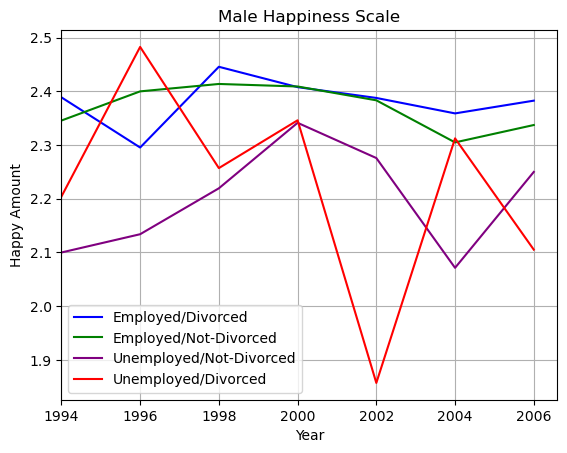

In [26]:
fig, ax = plt.subplots()
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['unem10']==0)&(happiness['divorce']==1)], ax=ax, color='blue',label="Employed/Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['divorce']==0)&(happiness['unem10']==0)], ax=ax, color='green',label="Employed/Not-Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['unem10']==1)&(happiness['divorce']==0)], ax=ax, color='purple',label="Unemployed/Not-Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['divorce']==1)&(happiness['unem10']==1)], ax=ax, color='red',label="Unemployed/Divorced")

# sns.lineplot(x='year',y='happy',ci=None,data=df[df['female']==1], ax=ax, color='red',label="Female Happiness")


ax.set_title('Male Happiness Scale')
ax.set_xlabel('Year')
ax.set_ylabel('Happy Amount')

ax.grid()
ax.set_xlim(xmin=1994)

# Show the legend
ax.legend()
# Show the plot
plt.show()

In [136]:
fig = px.line(dfSuicide[dfSuicide['country']=='United States'],x='year',y='population')

# fig = px.line(happiness[(happiness['female']==0)&(happiness['unem10']==0)&(happiness['divorce']==1)],x='year',y='happy',line_shape='spline')
# sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['divorce']==0)&(happiness['unem10']==0)], ax=ax, color='green',label="Employed/Not-Divorced")
# sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['unem10']==1)&(happiness['divorce']==0)], ax=ax, color='purple',label="Unemployed/Not-Divorced")
# sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)&(happiness['divorce']==1)&(happiness['unem10']==1)], ax=ax, color='red',label="Unemployed/Divorced")

# sns.lineplot(x='year',y='happy',ci=None,data=df[df['female']==1], ax=ax, color='red',label="Female Happiness")


fig.update_layout(
    xaxis_title="Generation",
    yaxis_title="Number of Suicides",
    title="Number of Suicides by Generation and Sex"
)

fig.show()

In [134]:
import plotly.graph_objs as go
import plotly.express as px

# Create filtered dataframes
employed_divorced_male = happiness[(happiness['female']==0)&(happiness['unem10']==0)&(happiness['divorce']==1)]
employed_notdivorced_male = happiness[(happiness['female']==0)&(happiness['divorce']==0)&(happiness['unem10']==0)]
unemployed_notdivorced_male = happiness[(happiness['female']==0)&(happiness['unem10']==1)&(happiness['divorce']==0)]
unemployed_divorced_male = happiness[(happiness['female']==0)&(happiness['divorce']==1)&(happiness['unem10']==1)]

# Create traces
trace1 = px.line(x=employed_divorced_male['year'], y=employed_divorced_male['happy'], mode='lines', name='Employed/Divorced', line=dict(color='blue'))
trace2 = go.Scatter(x=employed_notdivorced_male['year'], y=employed_notdivorced_male['happy'], mode='lines', name='Employed/Not-Divorced', line=dict(color='green'))
trace3 = go.Scatter(x=unemployed_notdivorced_male['year'], y=unemployed_notdivorced_male['happy'], mode='lines', name='Unemployed/Not-Divorced', line=dict(color='purple'))
trace4 = go.Scatter(x=unemployed_divorced_male['year'], y=unemployed_divorced_male['happy'], mode='lines', name='Unemployed/Divorced', line=dict(color='red'))

# Create layout
layout = go.Layout(title='Male Happiness Scale', xaxis=dict(title='Year'), yaxis=dict(title='Happy Amount'), hovermode='closest', legend=dict(x=0, y=1))

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)

# Show the plot
fig.show()


TypeError: line() got an unexpected keyword argument 'mode'

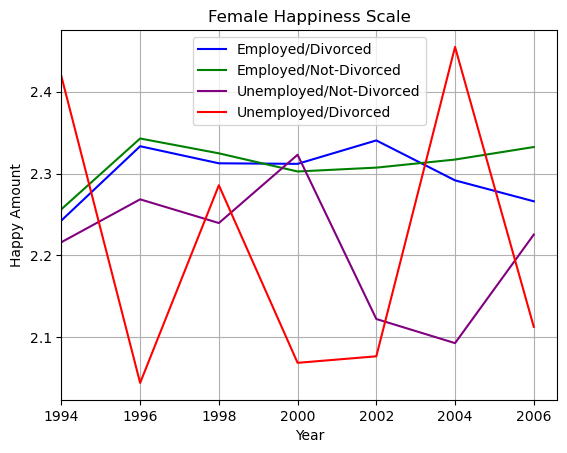

In [27]:
fig, ax = plt.subplots()
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)&(happiness['unem10']==0)&(happiness['divorce']==1)], ax=ax, color='blue',label="Employed/Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)&(happiness['divorce']==0)&(happiness['unem10']==0)], ax=ax, color='green',label="Employed/Not-Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)&(happiness['unem10']==1)&(happiness['divorce']==0)], ax=ax, color='purple',label="Unemployed/Not-Divorced")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)&(happiness['divorce']==1)&(happiness['unem10']==1)], ax=ax, color='red',label="Unemployed/Divorced")

# sns.lineplot(x='year',y='happy',ci=None,data=df[df['female']==1], ax=ax, color='red',label="Female Happiness")


ax.set_title('Female Happiness Scale')
ax.set_xlabel('Year')
ax.set_ylabel('Happy Amount')

ax.grid()
ax.set_xlim(xmin=1994)

# Show the legend
ax.legend()
# Show the plots
plt.show()

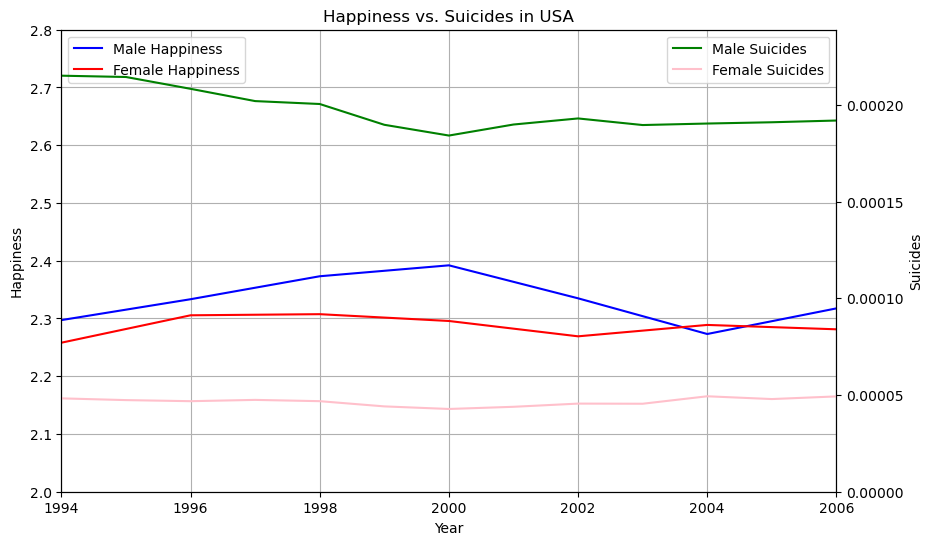

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==0)], ax=ax1, color='blue',label="Male Happiness")
sns.lineplot(x='year',y='happy',ci=None,data=happiness[(happiness['female']==1)], ax=ax1, color='red',label="Female Happiness")

ax2 = ax1.twinx()
sns.lineplot(x="year", y="percapita", data=test, ax=ax2, color='green', label='Male Suicides')
sns.lineplot(x="year", y="percapita", data=testWomen,ax=ax2,color='pink',label='Female Suicides')
ax1.set_xlim(xmin=1994)
ax1.set_xlim(xmax=2006)
ax1.grid()
ax1.set_ylim(ymin=2)
ax2.set_ylim(ymin=0)
ax1.set_ylim(ymax=2.8)

ax1.set_xlabel('Year')
ax1.set_ylabel('Happiness')
ax2.set_ylabel('Suicides')
ax1.set_title('Happiness vs. Suicides in USA')
ax1.legend(loc='upper left')

# Show the plot
plt.show()


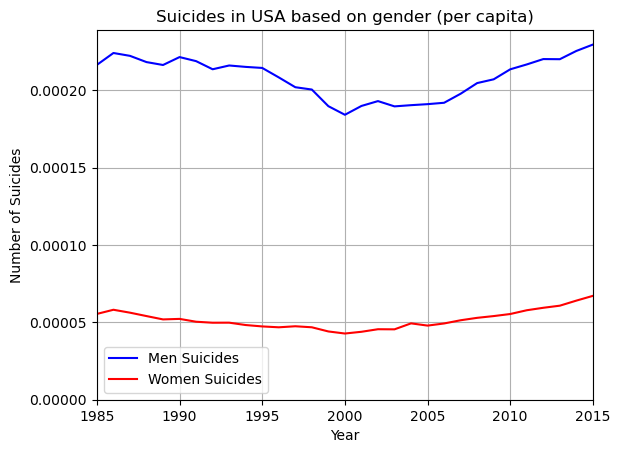

In [44]:
fig, ax = plt.subplots()
#test =usaOnly.loc[usaOnly['sex']==1].groupby('year').sum()
#testWomen =usaOnly.loc[usaOnly['sex']==2].groupby('year').sum()

sns.lineplot(x="year", y="percapita", data=test, ax=ax, color='blue', label='Men Suicides')
sns.lineplot(x="year", y="percapita", data=testWomen,ax=ax,color='red',label='Women Suicides')

ax.set_title('Suicides in USA based on gender (per capita)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Suicides')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=1985)
ax.set_xlim(xmax=2015)

ax.legend()
plt.grid()

plt.show()

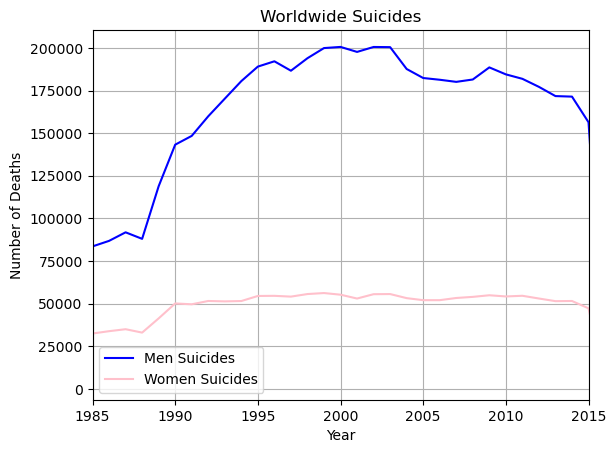

In [97]:
fig, ax = plt.subplots()
dftest =dfSuicide.loc[dfSuicide['sex']==1].groupby('year').sum()
dftestWomen =dfSuicide.loc[dfSuicide['sex']==2].groupby('year').sum()
sns.lineplot(x="year", y="suicides_no", data=dftest, ax=ax, color='blue', label='Men Suicides')
sns.lineplot(x="year", y="suicides_no", data=dftestWomen,ax=ax,color='pink',label='Women Suicides')

ax.set_title('Worldwide Suicides')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
ax.set_xlim(xmin=1985)
ax.set_xlim(xmax=2015)
# Show the legend
ax.legend()
ax.grid()
# Show the plot
plt.show()

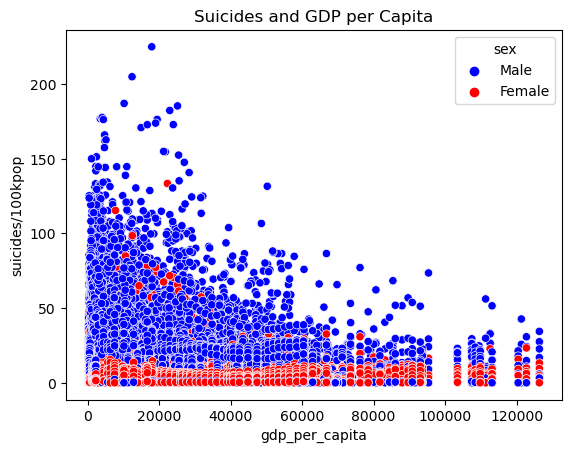

In [84]:
fig, ax = plt.subplots()

g= sns.scatterplot(x="gdp_per_capita", y="suicides/100kpop",palette=['blue','red'],hue='sex', data=testTwo)
ax.set_title('Suicides and GDP per Capita')
plt.show()

In [99]:
fig = px.scatter(testTwo, x='gdp_per_capita', y='suicides/100kpop', color='sex', color_discrete_sequence=['blue', 'red'],
                 title='Suicides and GDP per Capita')
fig.show()

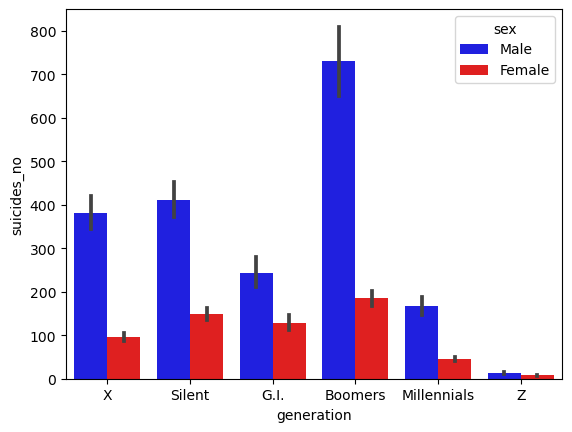

In [95]:
fig, ax = plt.subplots()
sns.barplot(x="generation",palette=['blue','red'], y="suicides_no",hue='sex', data=testTwo)

plt.show()